In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
from matplotlib import pyplot as plt
import time
from progress.bar import Bar
import pickle
import re
import preprocessing
from sklearn.decomposition import PCA
import umap
import pandas as pd
import seaborn as sb
import img_scatterplot

In [5]:
file = open('sampled-300_labelled_data.pkl', 'rb')
file1 = open('sampled-300_unlabelled_data.pkl', 'rb')

fileNames = open('sampled-300_labelled_names.pkl', 'rb')  #last letter of each file name is the label

labelled_data = pickle.load(file)
unlabelled_data = pickle.load(file1)

labels = pickle.load(fileNames)

for i in range(len(labels)):  #keep only the last letter of each file
    l = labels[i]
    labels[i] = l[-1]


In [6]:
labelled_preprocessed, l_mean, l_std = preprocessing.preprocess(labelled_data, False)

167.0
0.0
8.086622914825321
-2.0064650527925343
-4.880681556795793e-17
0.9999999999999992
normalized_cropped_data:  (300, 309, 84, 1)


In [7]:
unlabelled_preprocessed, unl_mean, unl_std = preprocessing.preprocess(unlabelled_data, False)

216.0
0.0
11.116069410641547
-2.0127799565323605
-1.0950690377882257e-16
0.9999999999999992
normalized_cropped_data:  (2000, 309, 84, 1)


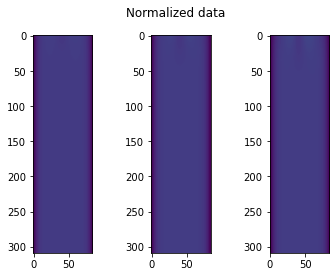

In [5]:
fig=plt.figure()
columns = 3
rows = 1
for i in range(1, columns*rows+1):
    if (i == unlabelled_preprocessed.shape[0]):
        break
    img = unlabelled_preprocessed[i,:,:,0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='viridis', vmin=unlabelled_preprocessed.min(), vmax=unlabelled_preprocessed.max())

fig = plt.gcf()
plt.suptitle('Normalized data') 
plt.show()

In [6]:
arrays = [i.ravel() for i in labelled_preprocessed]
ARR = np.asarray(np.stack(arrays))
df = pd.DataFrame(ARR)

In [7]:
seed = 1
pca = PCA(2, random_state=seed)
PCA_data = pca.fit_transform(df)

In [8]:
PCA_df = pd.DataFrame(PCA_data, columns = ['PC1','PC2'])
labels = pd.DataFrame(labels)
PCA_df['labels'] = labels
#PCA_df.head()

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

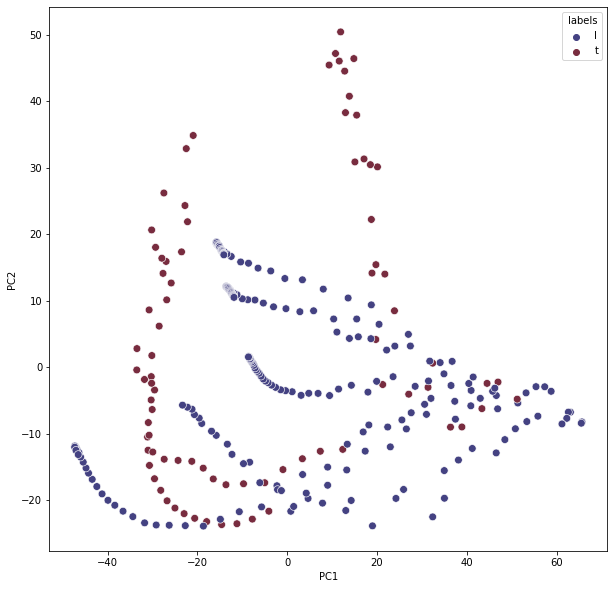

In [9]:
plt.figure(figsize = (10,10))
sb.scatterplot(data = PCA_df, x = 'PC1',y = 'PC2' , hue = 'labels' , s = 60 , palette= 'icefire')

# UMAP

In [10]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df)
embedding.shape

(300, 2)

In [11]:
UMAP_df = pd.DataFrame(embedding, columns = ['UMAP1','UMAP2'])
labels = pd.DataFrame(labels)
UMAP_df['labels'] = labels
#PCA_df.head()

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

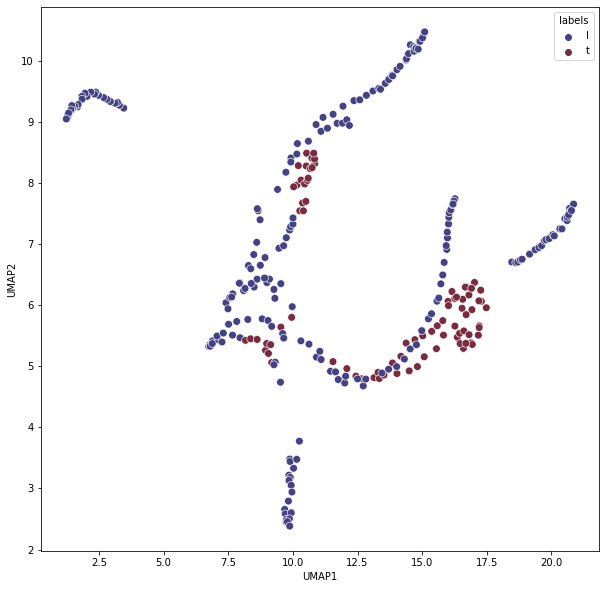

In [12]:
plt.figure(figsize = (10,10))
sb.scatterplot(data = UMAP_df, x = 'UMAP1',y = 'UMAP2' , hue = 'labels' , s = 60 , palette= 'icefire')

range of data: -2.0064650527925343 8.086622914825321
range of colormap: -2.0064650527925343 8.086622914825321


Text(0, 0.5, 'UMAP2')

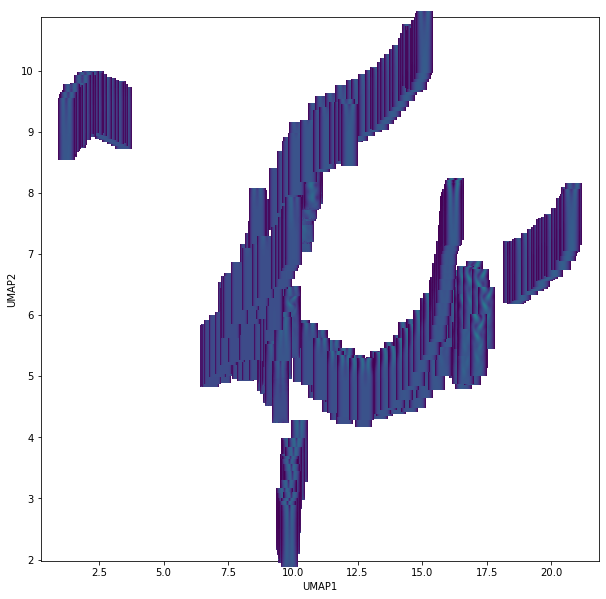

In [46]:
fig, ax = plt.subplots(figsize = (10,10))
img_scatterplot.scatterplot_with_imgs(UMAP_df['UMAP1'], UMAP_df['UMAP2'], labelled_preprocessed, ax=ax, zoom=0.2)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")

range of data: -2.0064650527925343 8.086622914825321
range of colormap: -2.0064650527925343 8.086622914825321


Text(0, 0.5, 'PCA2')

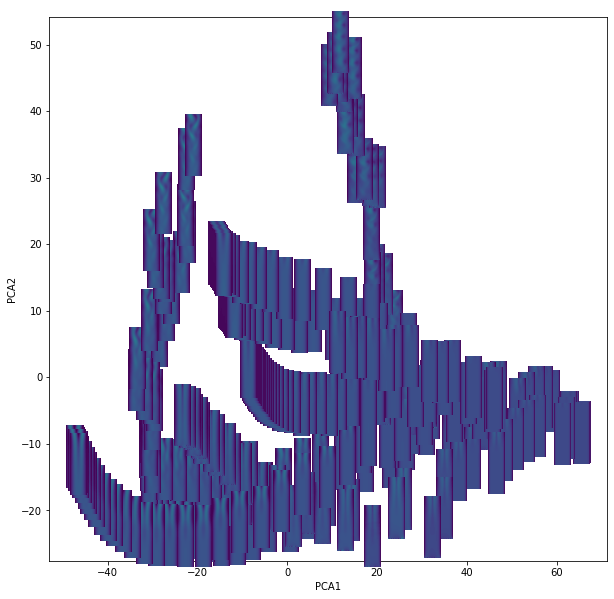

In [48]:
fig, ax = plt.subplots(figsize = (10,10))
img_scatterplot.scatterplot_with_imgs(PCA_df['PC1'], PCA_df['PC2'], labelled_preprocessed, ax=ax, zoom=0.2)
plt.xlabel("PCA1")
plt.ylabel("PCA2")

# Neighborhood - hit metric 

In [15]:
from sklearn.neighbors import NearestNeighbors

temp_df = PCA_df[['PC1','PC2']]

fractions = np.zeros(len(PCA_df))
neigh = NearestNeighbors(n_neighbors=17)
neigh.fit(temp_df)

LABELS = labels.values.ravel()

for i in range(len(fractions)):
    point = np.asarray(temp_df.iloc[i]).reshape(1,2)
    index = neigh.kneighbors(point, return_distance=False).ravel()
    count = 0
    for j in range(1,len(index)):
        if LABELS[index[j]] == LABELS[index[0]]:
            count += 1
        
    fractions[i] = count/17

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have val

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have val

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have val

In [16]:
print("Hit neighborhood metric for PCA = " , sum(fractions)/len(fractions))

Hit neighborhood metric for PCA =  0.7574509803921553


In [17]:
from sklearn.neighbors import NearestNeighbors

temp_df = UMAP_df[['UMAP1','UMAP2']]

fractions = np.zeros(len(UMAP_df))
neigh = NearestNeighbors(n_neighbors=17)
neigh.fit(temp_df)

LABELS = labels.values.ravel()

for i in range(len(fractions)):
    point = np.asarray(temp_df.iloc[i]).reshape(1,2)
    index = neigh.kneighbors(point, return_distance=False).ravel()
    count = 0
    for j in range(1,len(index)):
        if LABELS[index[j]] == LABELS[index[0]]:
            count += 1
        
    fractions[i] = count/17
    

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have val

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have val

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have val

In [18]:
print("Hit neighborhood metric for UMAP = " , sum(fractions)/len(fractions))

Hit neighborhood metric for UMAP =  0.7850980392156842


# Feature extraction

In [1]:
import keras
from keras import layers
import tensorflow as tf
from keras.callbacks import TensorBoard

In [151]:
def build_autoencoder(img_shape, code_size):
    #Build encoder
    encoder = keras.Sequential()
    encoder.add(layers.Conv2D(64, (3, 3), activation='elu', padding='same',strides = (2,2), input_shape=img_shape))
    encoder.add(layers.Conv2D(64, (3, 3), activation='elu',padding='same', strides = (2,2)))
    encoder.add(layers.Conv2D(64, (3, 3), activation='elu',padding='same', strides = (2,2)))
    encoder.add(layers.Conv2D(64, (3, 3), activation='elu',padding='same', strides = (2,2)))
    encoder.add(layers.Flatten())
    encoder.add(layers.Dense(2*code_size, activation='elu'))
    encoder.add(layers.Dense(code_size, activation='elu', activity_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.002)))
    
    #Build decoder
    decoder = keras.Sequential()
    decoder.add(layers.Dense(7680))
    decoder.add(layers.Reshape((20 , 6 , 64)))
    decoder.add(layers.Conv2DTranspose(64, (3,3),activation='elu',  padding='same',strides = (2,2), output_padding=(0,0)))
    decoder.add(layers.Conv2DTranspose(64, (3,3),  activation='elu',padding='same',strides = (2,2), output_padding=(1,0)))
    decoder.add(layers.Conv2DTranspose(64, (3,3),activation='elu',  padding='same',strides = (2,2), output_padding=(0,1)))
    decoder.add(layers.Conv2DTranspose(1, (3,3), activation='elu', padding='same',strides = (2,2), output_padding=(0,1)))
    
    return encoder, decoder
    
                

In [152]:
img_shape = labelled_preprocessed.shape[1:]
encoder, decoder = build_autoencoder(img_shape, 512)

inp = keras.Input(img_shape)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = keras.Model(inp,reconstruction)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='MSE')

autoencoder.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 309, 84, 1)]      0         
                                                                 
 sequential_45 (Sequential)  (None, 512)               8501568   
                                                                 
 sequential_46 (Sequential)  (None, 309, 84, 1)        4051201   
                                                                 
Total params: 12,552,769
Trainable params: 12,552,769
Non-trainable params: 0
_________________________________________________________________


In [159]:
history = autoencoder.fit(unlabelled_preprocessed, unlabelled_preprocessed,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(labelled_preprocessed, labelled_preprocessed),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/10
16/16 [==============================] - 29s 2s/step - loss: 0.1219 - val_loss: 0.1222
Epoch 2/10
16/16 [==============================] - 27s 2s/step - loss: 0.1078 - val_loss: 0.1122
Epoch 3/10
16/16 [==============================] - 29s 2s/step - loss: 0.1004 - val_loss: 0.1068
Epoch 4/10
16/16 [==============================] - 26s 2s/step - loss: 0.0975 - val_loss: 0.1151
Epoch 5/10
16/16 [==============================] - 27s 2s/step - loss: 0.1136 - val_loss: 0.1170
Epoch 6/10
16/16 [==============================] - 28s 2s/step - loss: 0.1048 - val_loss: 0.1096
Epoch 7/10
16/16 [==============================] - 29s 2s/step - loss: 0.0994 - val_loss: 0.1036
Epoch 8/10
16/16 [==============================] - 29s 2s/step - loss: 0.0937 - val_loss: 0.1004
Epoch 9/10
16/16 [==============================] - 29s 2s/step - loss: 0.0913 - val_loss: 0.0986
Epoch 10/10
16/16 [==============================] - 30s 2s/step - loss: 0.0898 - val_loss: 0.0970


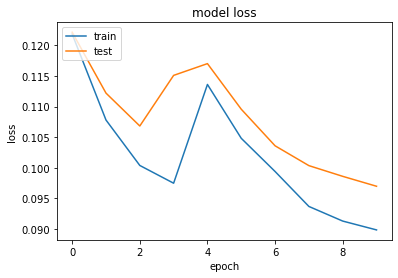

In [160]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

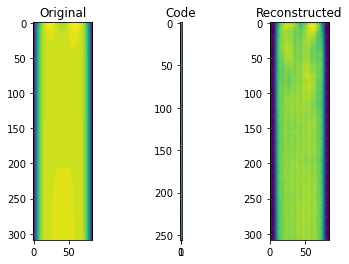

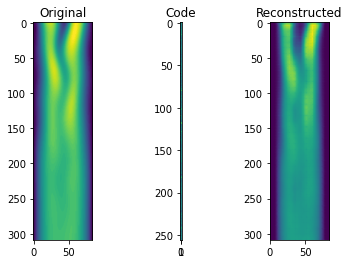

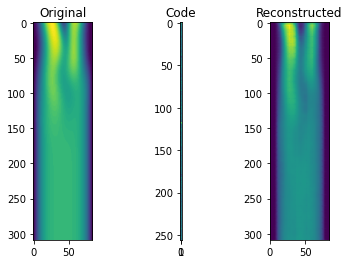

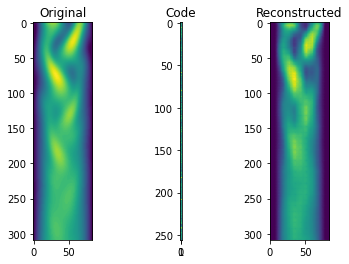

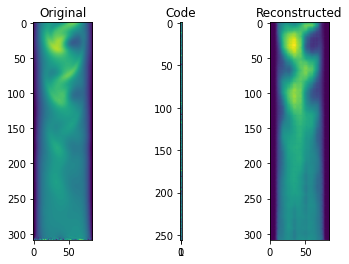

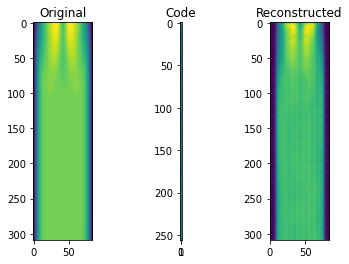

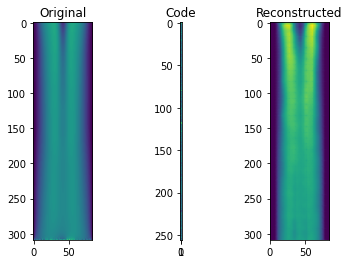

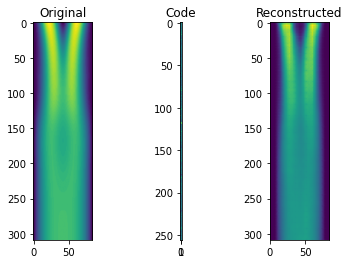

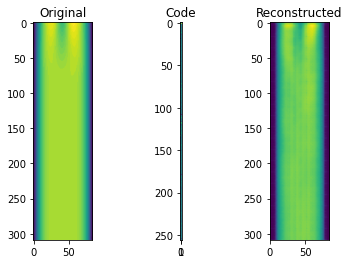

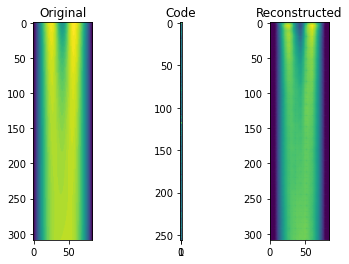

In [162]:
def show_image(x):
    plt.imshow(x)

def visualize(img, encoder,decoder):
    """Draws original, encoded and decoded images"""
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
    
    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(10):
    img = labelled_preprocessed[23*i,:,:,0]
    visualize(img,encoder,decoder)